#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import holoviews as hv

#### Reading the data

In [2]:
#weekly number of customer visits to each of the company's cinemas
customer_visit_number = pd.read_csv("https://tinyurl.com/ChrisCoDV/001376336/CinemaWeeklyVisitors.csv",index_col=0)
#the average age of visitors at each cinema
avg_age_of_visitors = pd.read_csv("https://tinyurl.com/ChrisCoDV/001376336/CinemaAge.csv",index_col=0)
#seating capacity for each cinema
seating_capacity = pd.read_csv("https://tinyurl.com/ChrisCoDV/001376336/CinemaCapacity.csv",index_col=0)
#average annual spend on local marketing for each cinema
avg_annual_spend = pd.read_csv("https://tinyurl.com/ChrisCoDV/001376336/CinemaMarketing.csv",index_col=0)
#average annual overheads for each cinema
avg_annual_overheads = pd.read_csv("https://tinyurl.com/ChrisCoDV/001376336/CinemaOverheads.csv",index_col=0)
#the average spend (£) by visitors at each cinema
avg_spend_by_visitors = pd.read_csv("https://tinyurl.com/ChrisCoDV/001376336/CinemaSpend.csv",index_col=0)

#### customer data

In [3]:
# displaying the first 5 records
customer_visit_number.head()

,XQE,WBK,CWN,VPG,YCI,XEZ,ZQL,BKK,SDT,UDD,...,WQW,CCX,SJE,BQV,BWF,TPY,AKA,TJN,ACQ,WKL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,140,528,0,974,116,174,117,0,0,433,...,210,0,342,0,190,489,0,453,200,124
2019-01-08,157,522,0,804,125,130,92,0,0,510,...,165,0,301,0,167,388,0,461,159,150
2019-01-15,173,498,0,717,140,176,127,0,0,320,...,246,0,270,0,206,484,0,447,120,99
2019-01-22,151,510,0,751,164,187,80,0,0,328,...,195,0,232,0,207,448,0,457,204,123
2019-01-29,131,485,0,950,124,158,146,0,0,254,...,139,0,313,0,163,502,0,457,162,101


In [4]:
# printing the shape of the dataset
customer_visit_number.shape

(209, 30)

#### summary data

In [5]:
# Building the summary_data dataframe
summary_data = pd.DataFrame(index=customer_visit_number.columns)
summary_data['Total Visitors'] = customer_visit_number.sum().values
summary_data['Average Age'] = avg_age_of_visitors .values
summary_data['Seating Capacity'] = seating_capacity.values
summary_data['Average Annual Spend'] = avg_annual_spend.values
summary_data['Average Annual Overheads'] = avg_annual_overheads.values
summary_data['Average Spend'] = avg_spend_by_visitors.values

In [6]:
# displaying the first 5 records
summary_data.head()

,Total Visitors,Average Age,Seating Capacity,Average Annual Spend,Average Annual Overheads,Average Spend
XQE,32391,40,32,2,65,17
WBK,105209,38,232,15,80,23
CWN,5732,42,30,1,64,19
VPG,190112,26,244,30,45,15
YCI,29148,31,50,3,30,11


In [7]:
# displaying the shape of the dataset
summary_data.shape

(30, 6)

### Customer data visualizations

#### 1. Bar graph displaying total number of visitors for each cinema company over 4 year

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
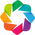

:Bars   [index]   (0)

In [10]:
# plotting an interactive bar graph
plot = customer_visit_number.sum().hvplot.bar(
    frame_height=200, frame_width=600,
    xlabel='Cinemas', ylabel='Number of visitors',
    title='Total Number of customer visits for each cinemas',
    rot=90,
)
hv.extension('bokeh')
plot

The above interactive bar graph contains a total of 5 user interaction tool namely Pan, Box Zoom, Wheel Zoom, save, Reset, and Hover
Instructions:
1. PAN:
   Use this tool if you want to move the plot vertically and horizontally. To do this, select the tool and then move the plot
2. Box Zoom
   Use this tool if you want to clearly examine only particular areas of plot. To do this, select the tool and then select the area you want to examine by dragging that area. Then that area will be zoomed
3. Wheel Zoom
   Use this tool if you want to zoom the area where the cursor is placed. To do this, select the tool and zoom the area you want.
4. Save
   Use this tool if you want to save the image. To do this, click on the tool and select the file name and click ok
5. Reset
   Use this tool if you want to restore the image to its initial state
6. Hover
   Use this tool if you want to get the value of a bar. To do this, select the tool and place the cursor on the bar.

#### 2. Stacked area plot to find the trends

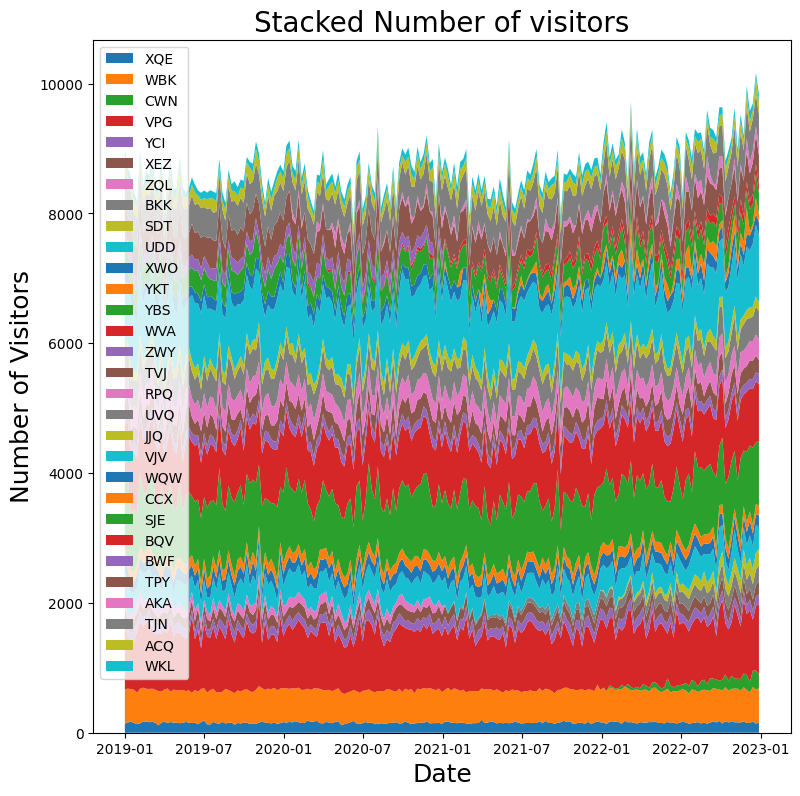

In [11]:
customer_visit_number = pd.read_csv("https://tinyurl.com/ChrisCoDV/001376336/CinemaWeeklyVisitors.csv",index_col=0)
pd.plotting.register_matplotlib_converters()
customer_visit_number.index = pd.to_datetime(customer_visit_number.index)

plt.figure(figsize=(9, 9))
plt.stackplot(customer_visit_number.index, customer_visit_number.transpose()) 
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Visitors', fontsize=18)
plt.title('Stacked Number of visitors',
    fontsize=20)
plt.legend(customer_visit_number.columns, loc=2)
plt.show()


#### 3. Autocorrelation plot of all cinemas

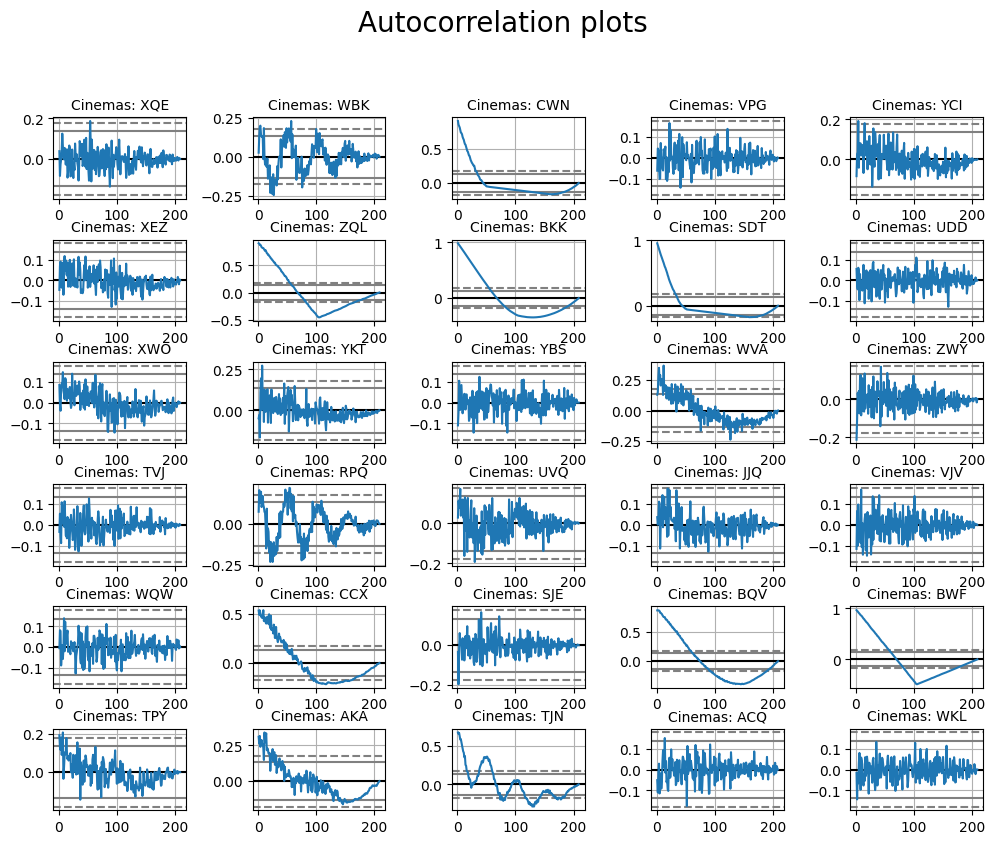

In [122]:
customer_visit_number = pd.read_csv("https://tinyurl.com/ChrisCoDV/001376336/CinemaWeeklyVisitors.csv",index_col=0)
pd.plotting.register_matplotlib_converters()
customer_visit_number.index = pd.to_datetime(customer_visit_number.index)

row = 0
col = 0
fig, axes = plt.subplots(figsize=(12, 9), nrows=6, ncols=5)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in customer_visit_number.columns:
    sub = pd.plotting.autocorrelation_plot(customer_visit_number[name], axes[row, col])
    sub.set_title('Cinemas: ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


#### 4. Box plot of low volume cinemas to identify the data distribution and outliers

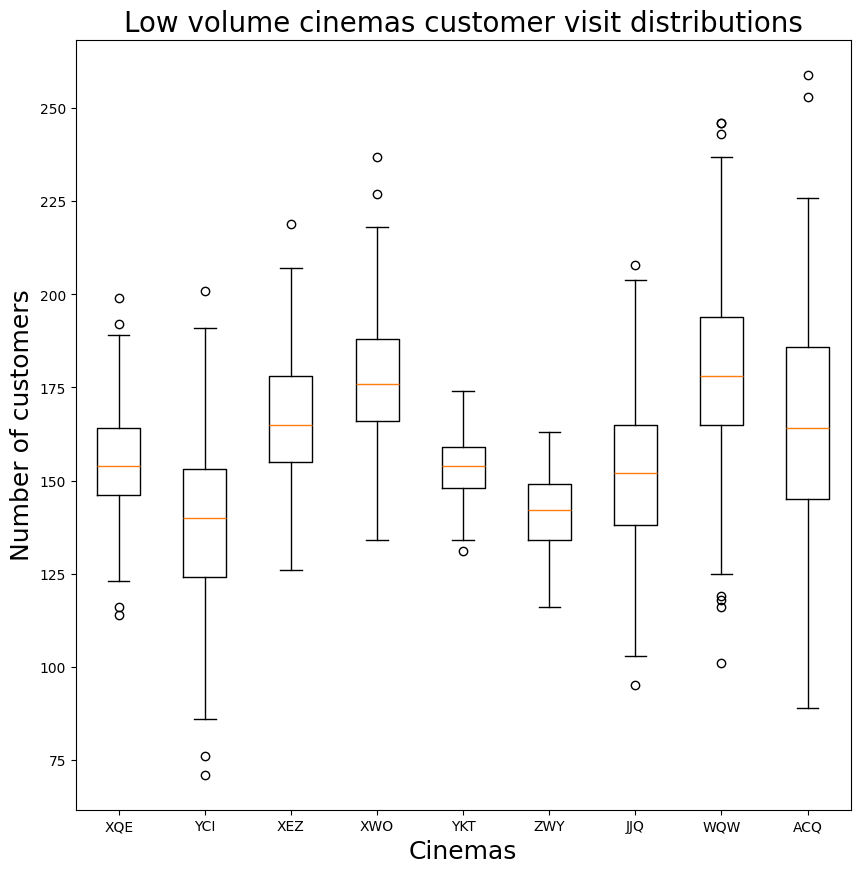

In [12]:
customer_visit_number = pd.read_csv("https://tinyurl.com/ChrisCoDV/001376336/CinemaWeeklyVisitors.csv",index_col=0)
pd.plotting.register_matplotlib_converters()
customer_visit_number.index = pd.to_datetime(customer_visit_number.index)

plt.figure(figsize=(10, 10))
low_volume_cinemas = ['XQE', 'YCI', 'XEZ', 'XWO', 'YKT', 'ZWY', 'JJQ', 'WQW', 'ACQ']
plt.boxplot(customer_visit_number[low_volume_cinemas], labels=low_volume_cinemas)
plt.xlabel('Cinemas', fontsize=18)
plt.ylabel('Number of customers', fontsize=18)
plt.title('Low volume cinemas customer visit distributions', fontsize=20)
plt.show()


### Summary Data Visualization

#### 5. Correlation plot of summary data for finding the feature relation

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
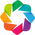

:HeatMap   [columns,index]   (value)

In [13]:
plot = summary_data.corr().hvplot.heatmap(
    frame_height=500, frame_width=500,
    title='Summary Data correlations',
    rot=90, cmap='coolwarm'  # see http://holoviews.org/user_guide/Colormaps.html
).opts(invert_yaxis=True, clim=(-1, 1))
hv.extension('bokeh')
plot

The above interactive bar graph contains a total of 5 user interaction tool namely Pan, Box Zoom, Wheel Zoom, save, Reset, and Hover
Instructions:
1. PAN:
   Use this tool if you want to move the plot vertically and horizontally. To do this, select the tool and then move the plot
2. Box Zoom
   Use this tool if you want to clearly examine only particular areas of plot. To do this, select the tool and then select the area you want to examine by dragging that area. Then that area will be zoomed
3. Wheel Zoom
   Use this tool if you want to zoom the area where the cursor is placed. To do this, select the tool and zoom the area you want.
4. Save
   Use this tool if you want to save the image. To do this, click on the tool and select the file name and click ok
5. Reset
   Use this tool if you want to restore the image to its initial state
6. Hover
   Use this tool if you want to get the value of correlation plot. To do this, select the tool and place the cursor on the corresponding square.

#### 6. Scatter plot of Total Visitors versus Average Annual Spend

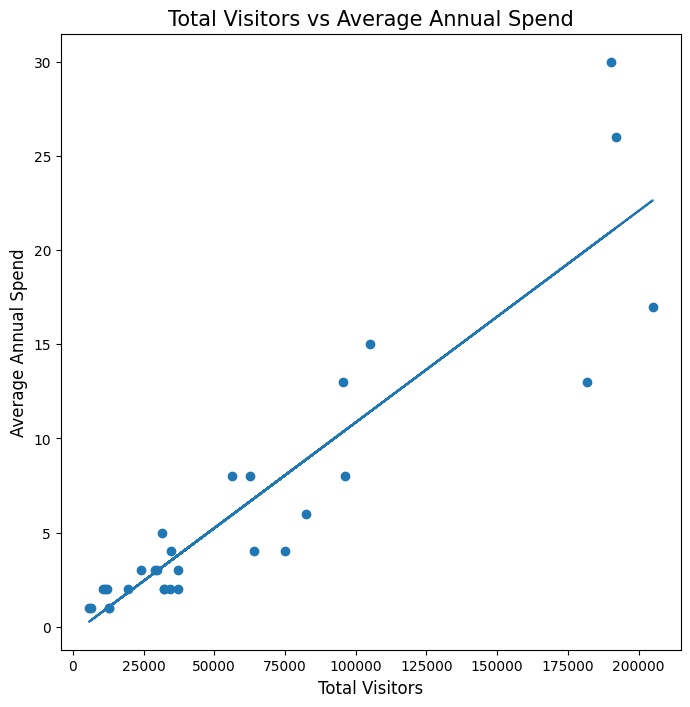

In [14]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Total Visitors'], summary_data['Average Annual Spend'])
z = np.polyfit(summary_data['Total Visitors'], summary_data['Average Annual Spend'], 1)
trend = np.poly1d(z)
plt.plot(summary_data['Total Visitors'], trend(summary_data['Total Visitors']))
plt.title('Total Visitors vs Average Annual Spend', fontsize=15)
plt.xlabel('Total Visitors', fontsize=12)
plt.ylabel('Average Annual Spend', fontsize=12)
plt.show()

#### 7. Radar plot of High Volume Cinemas

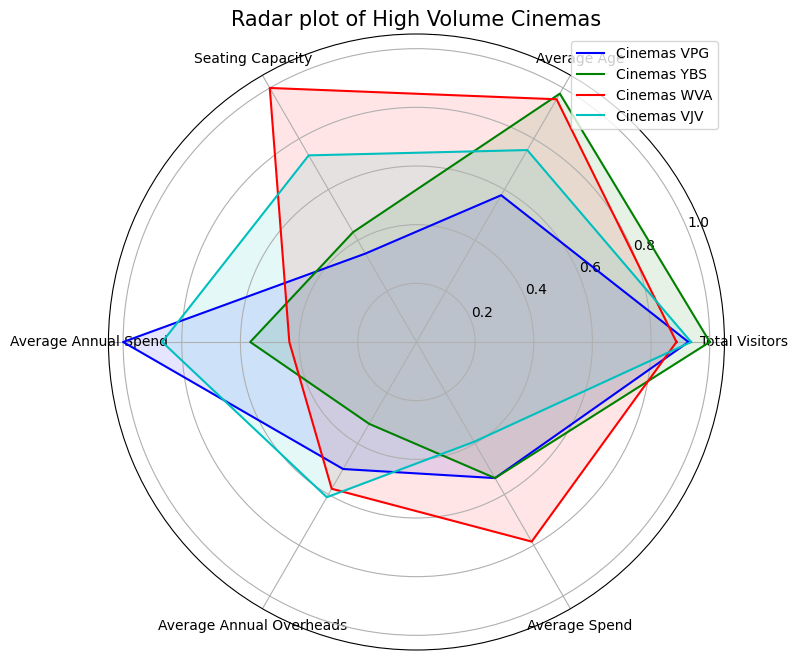

In [15]:
normalised_data = summary_data / summary_data.max()
selected = ['VPG', 'YBS', 'WVA', 'VJV' ]

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
plt.title('Radar plot of High Volume Cinemas', fontsize=15)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Cinemas ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

#### 8. Radar plot of Medium Volume Cinemas

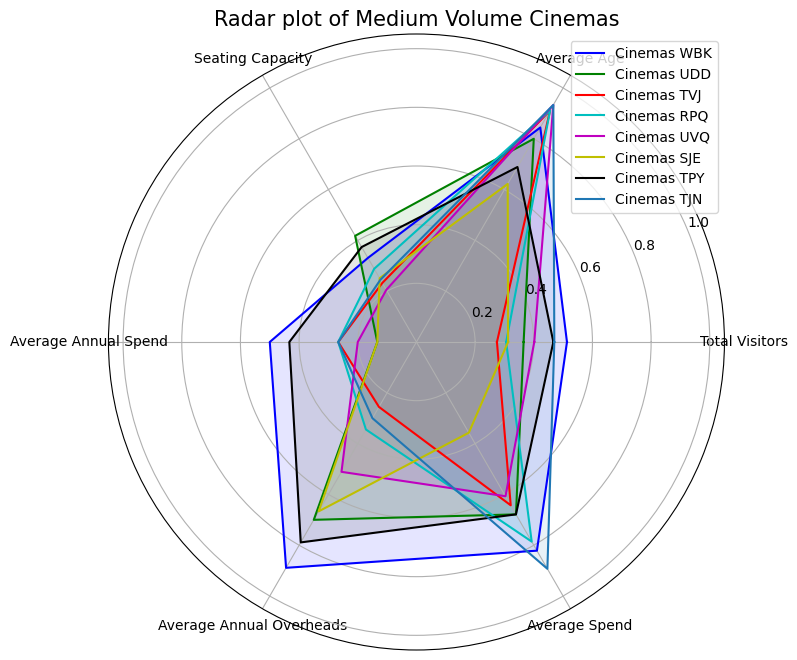

In [16]:
normalised_data = summary_data / summary_data.max()
selected = ['WBK', 'UDD', 'TVJ', 'RPQ', 'UVQ', 'SJE', 'TPY', 'TJN']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
plt.title('Radar plot of Medium Volume Cinemas', fontsize=15)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Cinemas ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()